In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets
iris = datasets.load_iris()

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(rc={'figure.figsize': (14, 7)})

In [3]:
dataset = iris['data']
target = iris['target']
x = pd.DataFrame(dataset, columns=iris.feature_names)
y = pd.DataFrame(target, columns=['species'])
data = pd.concat([x, y], axis=1)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [5]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 1. Посчитать основные характеристики выборки по каждому признаку:
- среднее;
- дисперсия;
- минимум;
- максимум;
- размах.

In [6]:
describe_df = pd.DataFrame(index=x.columns, columns=['mean', 'var', 'min', 'max', 'range'])

for column in x.columns:
    describe_df['mean'].loc[column] = round(np.mean(x[column]), 2)
    describe_df['var'].loc[column] = round(np.var(x[column]), 2)
    describe_df['min'].loc[column] = round(np.min(x[column]), 2)
    describe_df['max'].loc[column] = round(np.max(x[column]), 2)
    describe_df['range'].loc[column] = round(np.max(x[column]) - np.min(x[column]), 2)
    
describe_df.T

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
mean,5.84,3.06,3.76,1.2
var,0.68,0.19,3.1,0.58
min,4.3,2.0,1.0,0.1
max,7.9,4.4,6.9,2.5
range,3.6,2.4,5.9,2.4


### 2. Визуализировать распределения признаков посредством seaborn

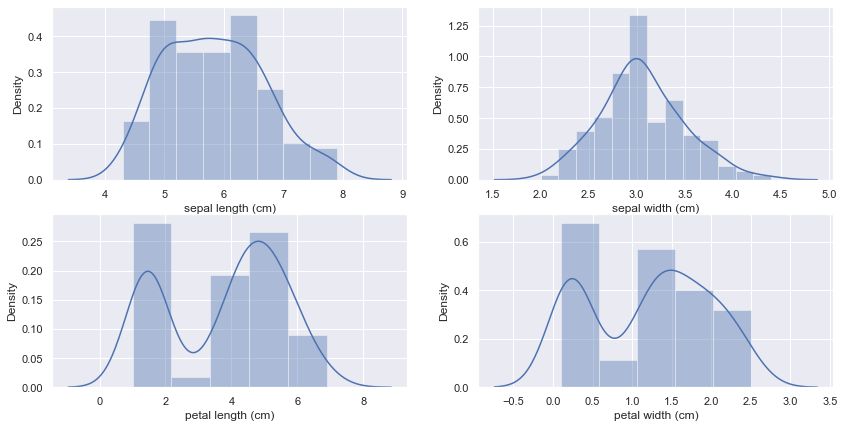

In [7]:
fig, axes = plt.subplots(2, 2)
sns.distplot(x['sepal length (cm)'], ax=axes[0, 0])
sns.distplot(x['sepal width (cm)'], ax=axes[0, 1])
sns.distplot(x['petal length (cm)'], ax=axes[1, 0])
sns.distplot(x['petal width (cm)'], ax=axes[1, 1]);

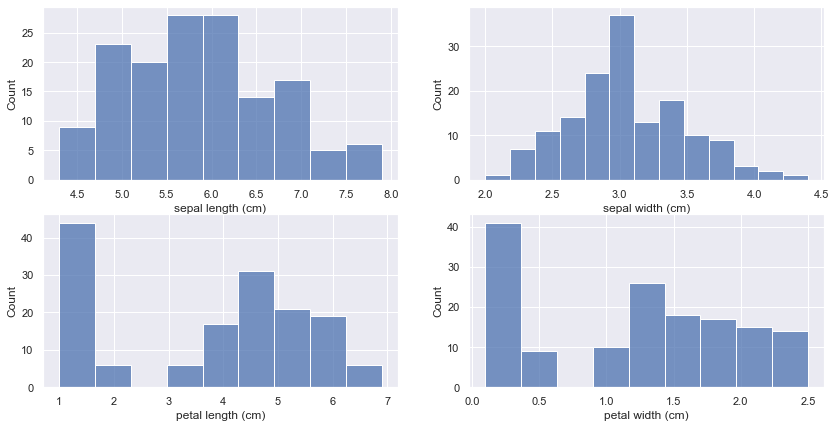

In [8]:
fig, axes = plt.subplots(2, 2)
sns.histplot(x['sepal length (cm)'], ax=axes[0, 0])
sns.histplot(x['sepal width (cm)'], ax=axes[0, 1])
sns.histplot(x['petal length (cm)'], ax=axes[1, 0])
sns.histplot(x['petal width (cm)'], ax=axes[1, 1]);

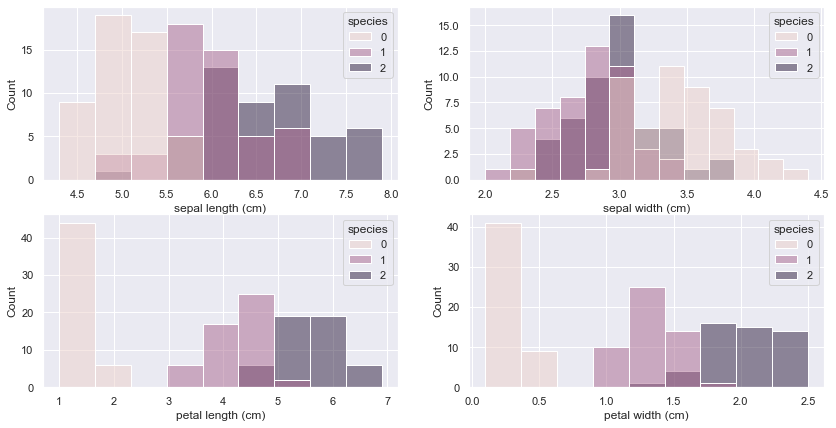

In [9]:
fig, axes = plt.subplots(2, 2)
sns.histplot(data=data, x='sepal length (cm)', hue='species', ax=axes[0, 0])
sns.histplot(data=data, x='sepal width (cm)', hue='species', ax=axes[0, 1])
sns.histplot(data=data, x='petal length (cm)', hue='species', ax=axes[1, 0])
sns.histplot(data=data, x='petal width (cm)', hue='species', ax=axes[1, 1]);

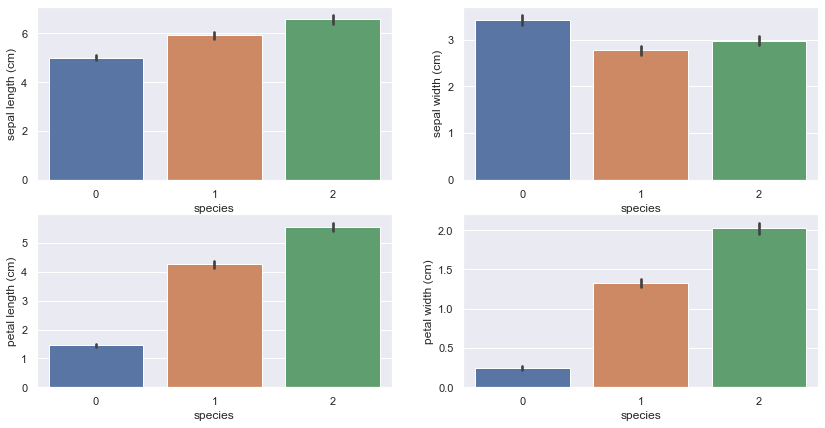

In [10]:
fig, axes = plt.subplots(2, 2)
sns.barplot(data=data, x='species', y='sepal length (cm)', ax=axes[0, 0])
sns.barplot(data=data, x='species', y='sepal width (cm)', ax=axes[0, 1])
sns.barplot(data=data, x='species', y='petal length (cm)', ax=axes[1, 0])
sns.barplot(data=data, x='species', y='petal width (cm)', ax=axes[1, 1]);

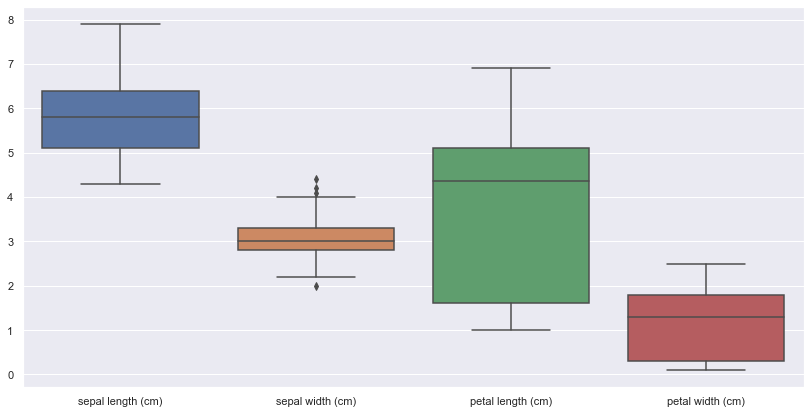

In [11]:
sns.boxplot(data=x);

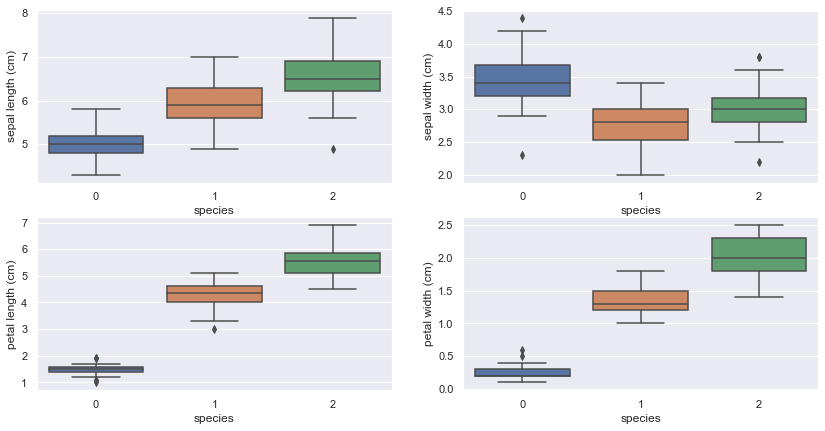

In [12]:
fig, axes = plt.subplots(2, 2)
sns.boxplot(data=data, x='species', y='sepal length (cm)', ax=axes[0, 0])
sns.boxplot(data=data, x='species', y='sepal width (cm)', ax=axes[0, 1])
sns.boxplot(data=data, x='species', y='petal length (cm)', ax=axes[1, 0])
sns.boxplot(data=data, x='species', y='petal width (cm)', ax=axes[1, 1]);

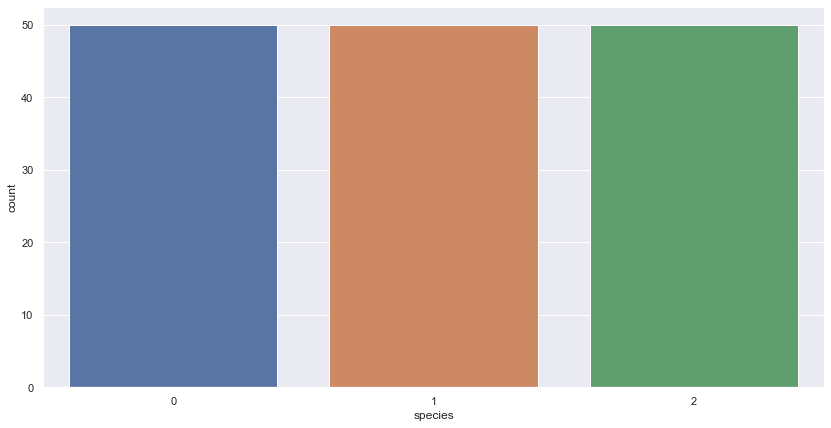

In [13]:
sns.countplot(data=data, x='species');

### 3. Посчитать и визуализировать корреляционную матрицу

In [14]:
corr_matrix = x.corr()
corr_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


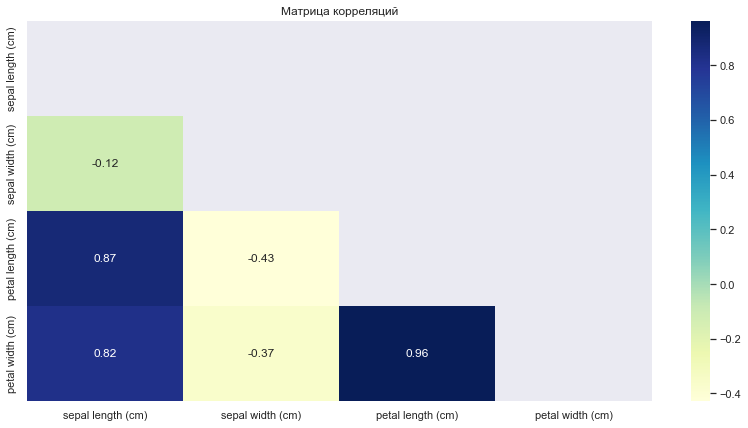

In [15]:
ax = sns.heatmap(corr_matrix, annot=True, mask=np.triu(x.corr()), cmap='YlGnBu')
ax.set_title('Матрица корреляций');

### 4. Проверить гипотезу о нормальности распределения для признаков 1 и 2

In [16]:
def normal_distribution_hypothesis_testing(column, alpha=0.05):
    stat, p = stats.shapiro(column)
    print(f'Значение статистики = {stat}, p_value = {p}')
    print(f'p_value > alpha ({p} > {alpha})') if p > alpha else print(f'p_value < alpha ({p} < {alpha})')
    if p > alpha:
        print(f'Нет оснований отклонять гипотезу о нормальности распределения для признака {column.name}')
    else:
        print(f'Отклоняем гипотезу о нормальности распределения для признака {column.name}')

In [17]:
normal_distribution_hypothesis_testing(x[x.columns[0]])

Значение статистики = 0.9760897755622864, p_value = 0.01017984002828598
p_value < alpha (0.01017984002828598 < 0.05)
Отклоняем гипотезу о нормальности распределения для признака sepal length (cm)


In [18]:
normal_distribution_hypothesis_testing(x[x.columns[1]])

Значение статистики = 0.9849170446395874, p_value = 0.10113201290369034
p_value > alpha (0.10113201290369034 > 0.05)
Нет оснований отклонять гипотезу о нормальности распределения для признака sepal width (cm)


### 5. Произвести расчёт статистик из пункта 1 для каждого значения таргета (группировка)

In [19]:
data.groupby(['species'])[x.columns].agg(['mean', 'var', 'min', 'max', np.ptp]).T

species                        0         1         2
sepal length (cm) mean  5.006000  5.936000  6.588000
                  var   0.124249  0.266433  0.404343
                  min   4.300000  4.900000  4.900000
                  max   5.800000  7.000000  7.900000
                  ptp   1.500000  2.100000  3.000000
sepal width (cm)  mean  3.428000  2.770000  2.974000
                  var   0.143690  0.098469  0.104004
                  min   2.300000  2.000000  2.200000
                  max   4.400000  3.400000  3.800000
                  ptp   2.100000  1.400000  1.600000
petal length (cm) mean  1.462000  4.260000  5.552000
                  var   0.030159  0.220816  0.304588
                  min   1.000000  3.000000  4.500000
                  max   1.900000  5.100000  6.900000
                  ptp   0.900000  2.100000  2.400000
petal width (cm)  mean  0.246000  1.326000  2.026000
                  var   0.011106  0.039106  0.075433
                  min   0.100000  1.000000  1.400000
                  max   0.600000  1.800000  2.500000
                  ptp   0.500000  0.800000  1.100000

### 6. Написать функцию, автоматизирующую EDA

In [20]:
def auto_eda(df):
    x = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    
    print('\033[1m' + 'Dataset info:\n' + '\033[0m')
    print(df.info())
    print()
    
    print('\033[1m' + 'Dataset describe:\n' + '\033[0m')
    print(df.describe())
    print()
    
    describe_df = pd.DataFrame(index=x.columns, columns=['mean', 'var', 'min', 'max', 'range'])

    for column in x.columns:
        describe_df['mean'].loc[column] = round(np.mean(x[column]), 2)
        describe_df['var'].loc[column] = round(np.var(x[column]), 2)
        describe_df['min'].loc[column] = round(np.min(x[column]), 2)
        describe_df['max'].loc[column] = round(np.max(x[column]), 2)
        describe_df['range'].loc[column] = round(np.max(x[column]) - np.min(x[column]), 2)

    print('\033[1m' + 
          'Основные характеристики выборки по каждому признаку (среднее, дисперсия, минимум, максимум, размах):\n' 
          + '\033[0m')
    print(describe_df.T)
    print()
    
    corr_matrix = x.corr()
    print('\033[1m' + 'Матрица корреляций:\n' + '\033[0m')
    print(corr_matrix)
    print()
    
    def normal_distribution_hypothesis_testing(column, alpha=0.05):
        stat, p = stats.shapiro(column)
        print(f'Значение статистики = {stat}, p_value = {p}')
        print(f'p_value > alpha ({p} > {alpha})') if p > alpha else print(f'p_value < alpha ({p} < {alpha})')
        if p > alpha:
            print(f'Нет оснований отклонять гипотезу о нормальности распределения для признака {column.name}')
        else:
            print(f'Отклоняем гипотезу о нормальности распределения для признака {column.name}')
            
    print('\033[1m' + 'Проверка гипотез о нормальности распределения для признаков 1 и 2:\n' + '\033[0m')
    normal_distribution_hypothesis_testing(x[x.columns[0]])
    print()
    normal_distribution_hypothesis_testing(x[x.columns[1]])
    print()
    
    print('\033[1m' + 'Расчёт статистик из пункта 1 для каждого значения таргета (группировка):\n' + '\033[0m')
    print(df.groupby(['species'])[x.columns].agg(['mean', 'var', 'min', 'max', np.ptp]).T)
    print()
    
    print('\033[1m' + 'Графики:\n' + '\033[0m')
        
    fig, axes = plt.subplots(2, 2)
    sns.distplot(x['sepal length (cm)'], ax=axes[0, 0])
    sns.distplot(x['sepal width (cm)'], ax=axes[0, 1])
    sns.distplot(x['petal length (cm)'], ax=axes[1, 0])
    sns.distplot(x['petal width (cm)'], ax=axes[1, 1])
    plt.show();
    
    fig, axes = plt.subplots(2, 2)
    sns.histplot(x['sepal length (cm)'], ax=axes[0, 0])
    sns.histplot(x['sepal width (cm)'], ax=axes[0, 1])
    sns.histplot(x['petal length (cm)'], ax=axes[1, 0])
    sns.histplot(x['petal width (cm)'], ax=axes[1, 1])
    plt.show();
    
    fig, axes = plt.subplots(2, 2)
    sns.histplot(data=df, x='sepal length (cm)', hue='species', ax=axes[0, 0])
    sns.histplot(data=df, x='sepal width (cm)', hue='species', ax=axes[0, 1])
    sns.histplot(data=df, x='petal length (cm)', hue='species', ax=axes[1, 0])
    sns.histplot(data=df, x='petal width (cm)', hue='species', ax=axes[1, 1])
    plt.show();
    
    fig, axes = plt.subplots(2, 2)
    sns.barplot(data=df, x='species', y='sepal length (cm)', ax=axes[0, 0])
    sns.barplot(data=df, x='species', y='sepal width (cm)', ax=axes[0, 1])
    sns.barplot(data=df, x='species', y='petal length (cm)', ax=axes[1, 0])
    sns.barplot(data=df, x='species', y='petal width (cm)', ax=axes[1, 1])
    plt.show();
    
    fig, axes = plt.subplots(2, 2)
    sns.boxplot(data=df, x='species', y='sepal length (cm)', ax=axes[0, 0])
    sns.boxplot(data=df, x='species', y='sepal width (cm)', ax=axes[0, 1])
    sns.boxplot(data=df, x='species', y='petal length (cm)', ax=axes[1, 0])
    sns.boxplot(data=df, x='species', y='petal width (cm)', ax=axes[1, 1])
    plt.show();
    
    fig, axes = plt.subplots(1, 2)
    sns.boxplot(data=x, ax=axes[0])
    sns.countplot(data=df, x='species', ax=axes[1])
    plt.show();
    
    sns.heatmap(corr_matrix, annot=True, mask=np.triu(x.corr()), cmap='YlGnBu')
    plt.show();

Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None

Dataset describe:

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%            

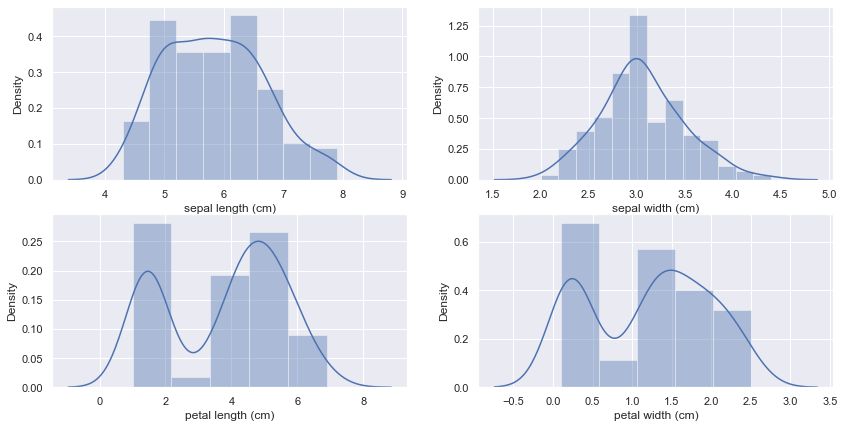

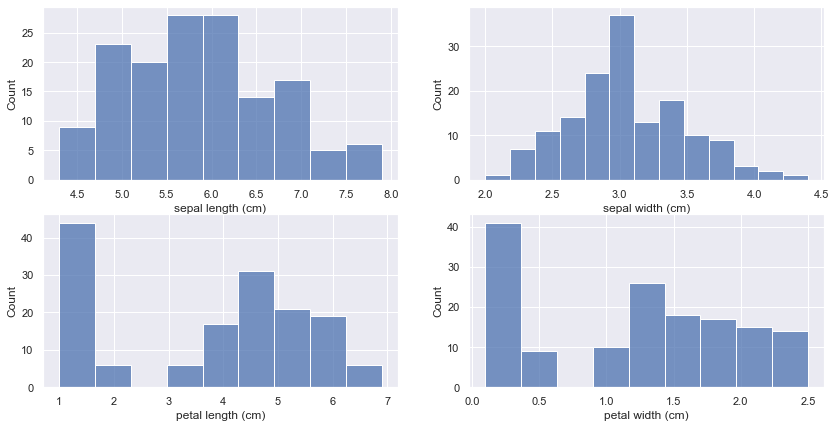

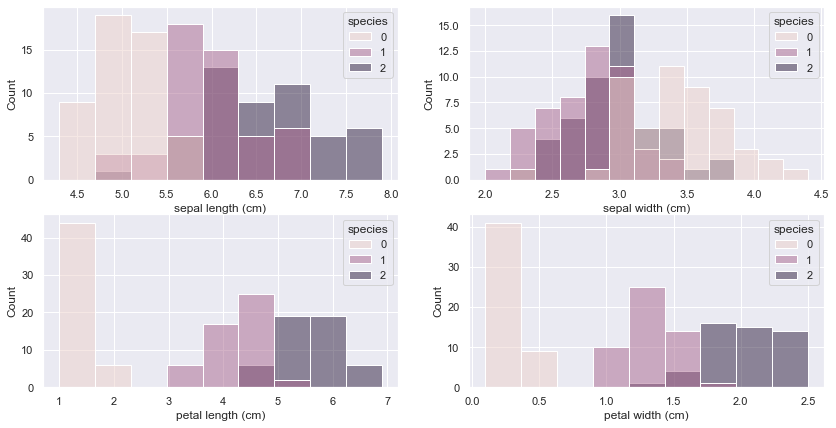

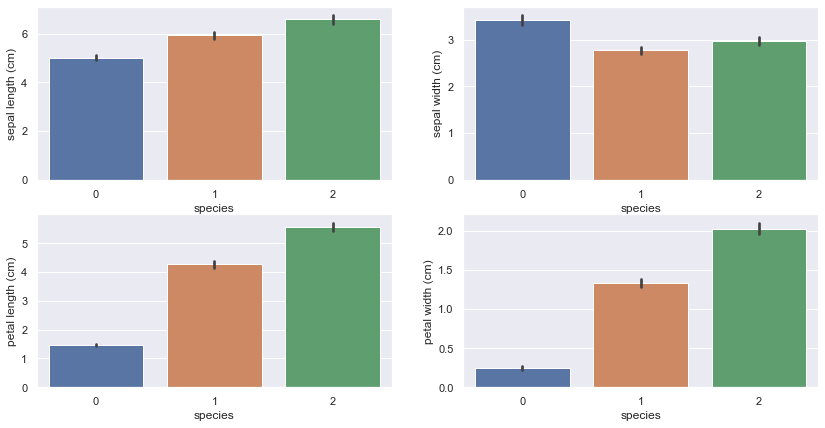

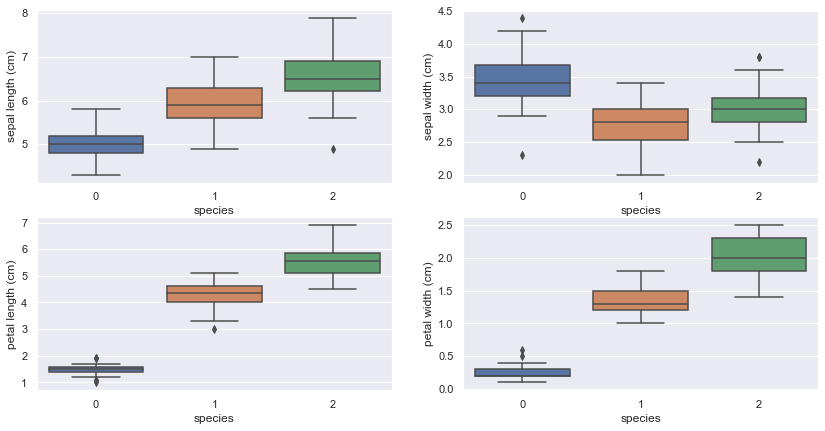

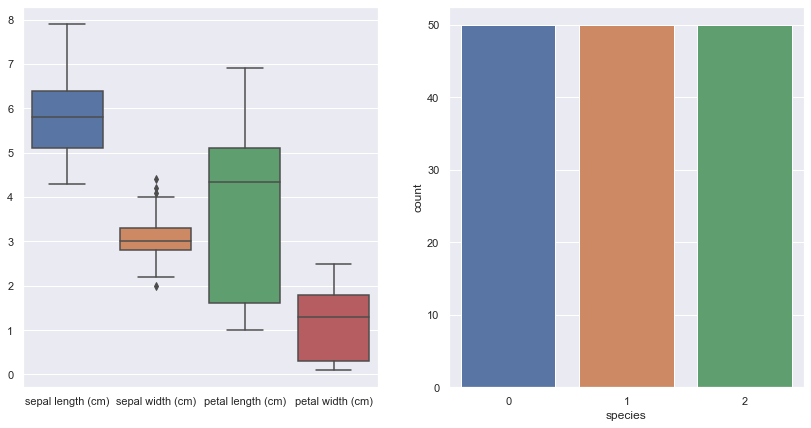

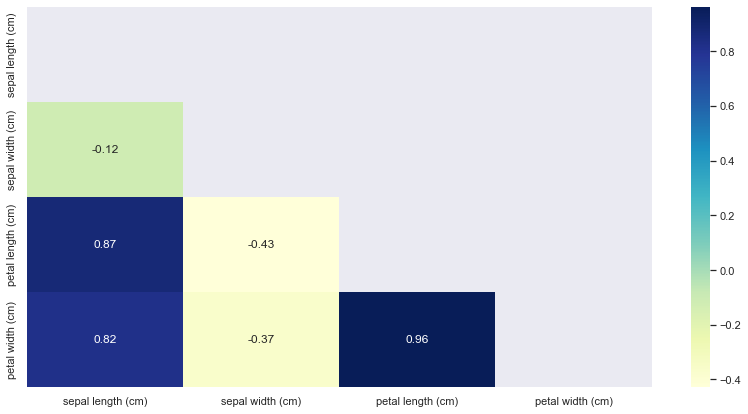

In [21]:
auto_eda(data)

### 7. Описать основные выводы по каждому разделу проекта. Какие выводы можно сделать на основе проведённого анализа?

1) У признака petal length (cm), по сравнению с остальными признаками, большое значение дисперсии и размаха, что говорит о том, что значения признака разбросаны в большем интервале, чем у других признаков.

2) У всех признаков есть немного выбросов, но у sepal width (cm) их довольно много, что сильно выделяется на графиках.

3) Признаки petal length (cm) и petal width (cm) лучше всех положительно скоррелированы с целевым признаком species. У признаков sepal length (cm) и petal length (cm), sepal length (cm) и petal width (cm), petal length (cm) и petal width (cm) хорошая положительная корреляция между собой.

4) Тест Шапиро-Уилка показал, что признак sepal length (cm) не имеет нормального распределения, а для признака sepal width (cm) нет оснований полагать, что он не имеет нормального распределения.

5) Класс 0 самый маленький, класс 1 средний, класс 2 самый крупный.